PROJECT OBJECTIVES:

- To determine the key overall sentiment by identifying whether the majority of comments are positive, negative or neutral towards the new national anthem
- To identify the key themes and topics by extracting common themes and topics being discussed in the comments 
- To analyse emotional tone by assessing the emotional tone of the comments, including like joy, anger, sadness etc.
- To examine the relationship between likes and sentiment by investigating whether comments with more likes tend to have a specific sentiment (e.g. positive or negative)
- To identify influential voices and to determine which individuals or groups have the most influence in shaping public opinion on the new national anthem
- To evaluate the impact of specific aspects by analysing how specific aspects of the national anthem (e.g. melody, lyrics, or arrangement are perceived by the public)


In [311]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [63]:
df=pd.read_csv("merged_dataset.csv")

In [64]:
df1 = df.copy()

In [65]:
df1.head()

,Avatar,Name,Likes,Comment,Date,id,userName,text,profileUrl,avatarUrl,...,SubCommentsCount,CommentAt,Unnamed: 0,Unnamed: 1,Name (click to view profile),isHearted,isPinned,Profile ID,Comment ID,Comment URL
0,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,@Babykk-sr1hb,1.0,Is not new nao.that was what we were reciting ...,2024-05-27 19:36:20,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,@AyaereOdeh-mb3uc,1.0,I love the old one.,2024-05-27 14:16:23,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://yt3.ggpht.com/rkZA65fEa1vvDa7JkeVqnl4D...,@gaskiyadacigareta8767,1.0,We no go gree with the new national anthem,2024-05-26 14:25:35,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://yt3.ggpht.com/ytc/AIdro_mGWnpBv46aNl96...,@chuks2778,1.0,The labour of our heroes past don finally beco...,2024-05-26 14:12:42,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,https://yt3.ggpht.com/H4S5K78hbgILTWw4hrxW8sQc...,@mancha2424,1.0,Is that our problem?,2024-05-26 04:31:44,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df1.columns

Index(['Avatar', 'Name', 'Likes', 'Comment', 'Date', 'id', 'userName', 'text',
       'profileUrl', 'avatarUrl', 'date', 'Id', 'UserId', 'Author', 'Content',
       'Url', 'ReactionsCount', 'Depth', 'SubCommentsCount', 'CommentAt',
       'Unnamed: 0', 'Unnamed: 1', 'Name (click to view profile)', 'isHearted',
       'isPinned', 'Profile ID', 'Comment ID', 'Comment URL'],
      dtype='object')

In [67]:
df1['isHearted'].value_counts()

no    236
Name: isHearted, dtype: int64

In [68]:
df1['name'] = df1[['userName', 'Name (click to view profile)', 'Name', 'Author']].bfill(axis=1).iloc[:, 0]
df1['profile_url'] = df1[['profileUrl','Comment URL', 'Avatar','avatarUrl', 'Url']].bfill(axis=1).iloc[:, 0]
df1['comment_id'] = df1[['Comment ID', 'id', 'Profile ID', 'Id', 'UserId']].bfill(axis=1).iloc[:, 0]
df1['likes'] = df1[['Likes', 'SubCommentsCount', 'ReactionsCount', 'Depth']].bfill(axis=1).iloc[:, 0]
df1['text'] = df1[['Comment', 'text', 'Content']].bfill(axis=1).iloc[:, 0]
df1['date'] = df1[['date', 'Date', 'CommentAt']].bfill(axis=1).iloc[:, 0]
#df1['combined_author'] = df1[['Author', 'userName']].bfill(axis=1).iloc[:, 0]

In [87]:
#df1.to_csv('nationalanthem2.csv', index=False)
df = pd.read_csv("nationalanthem1.csv")

In [88]:
df.head()

,username,url,id,likes,comment,date
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,NaN,1.0,Is not new nao.that was what we were reciting ...,5/27/2024 19:36
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,NaN,1.0,I love the old one.,5/27/2024 14:16
2,@gaskiyadacigareta8767,https://yt3.ggpht.com/rkZA65fEa1vvDa7JkeVqnl4D...,NaN,1.0,We no go gree with the new national anthem,5/26/2024 14:25
3,@chuks2778,https://yt3.ggpht.com/ytc/AIdro_mGWnpBv46aNl96...,NaN,1.0,The labour of our heroes past don finally beco...,5/26/2024 14:12
4,@mancha2424,https://yt3.ggpht.com/H4S5K78hbgILTWw4hrxW8sQc...,NaN,1.0,Is that our problem?,5/26/2024 4:31


In [89]:
df1 = df.copy()

In [92]:
df1.head()

,username,url,id,likes,comment,date
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,NaN,1.0,Is not new nao.that was what we were reciting ...,5/27/2024 19:36
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,NaN,1.0,I love the old one.,5/27/2024 14:16
2,@gaskiyadacigareta8767,https://yt3.ggpht.com/rkZA65fEa1vvDa7JkeVqnl4D...,NaN,1.0,We no go gree with the new national anthem,5/26/2024 14:25
3,@chuks2778,https://yt3.ggpht.com/ytc/AIdro_mGWnpBv46aNl96...,NaN,1.0,The labour of our heroes past don finally beco...,5/26/2024 14:12
4,@mancha2424,https://yt3.ggpht.com/H4S5K78hbgILTWw4hrxW8sQc...,NaN,1.0,Is that our problem?,5/26/2024 4:31


In [93]:
df1.isnull().sum()

username       0
url            0
id           338
likes       2112
comment       41
date           0
dtype: int64

In [95]:
df1.duplicated().sum()

1725

In [96]:
df1.shape

(6931, 6)

In [99]:
df1 = df1.drop_duplicates()

In [100]:
df1.duplicated().sum()

0

In [101]:
df1.head()

,username,url,id,likes,comment,date
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,NaN,1.0,Is not new nao.that was what we were reciting ...,5/27/2024 19:36
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,NaN,1.0,I love the old one.,5/27/2024 14:16
2,@gaskiyadacigareta8767,https://yt3.ggpht.com/rkZA65fEa1vvDa7JkeVqnl4D...,NaN,1.0,We no go gree with the new national anthem,5/26/2024 14:25
3,@chuks2778,https://yt3.ggpht.com/ytc/AIdro_mGWnpBv46aNl96...,NaN,1.0,The labour of our heroes past don finally beco...,5/26/2024 14:12
4,@mancha2424,https://yt3.ggpht.com/H4S5K78hbgILTWw4hrxW8sQc...,NaN,1.0,Is that our problem?,5/26/2024 4:31


In [105]:
df1.tail()

,username,url,id,likes,comment,date
6926,Taiwo Mercy Adegoke,https://scontent.flos5-3.fna.fbcdn.net/v/t39.3...,Y29tbWVudDozNzkyMzQ3MTM3NjUxNDMwXzk3OTc0NjgwNz...,0.0,Amazing 😍,5/31/2024 10:07
6927,A T Alayande Aanujudah,https://scontent.flos5-1.fna.fbcdn.net/v/t39.3...,Y29tbWVudDozNzkyMzQ3MTM3NjUxNDMwXzgyNjY1NjA0Mj...,0.0,Make I laugh small,5/31/2024 11:00
6928,Oyinbo Akewi,https://scontent.flos5-3.fna.fbcdn.net/v/t39.3...,Y29tbWVudDozNzkyMzQ3MTM3NjUxNDMwXzExMjE5MTk5Nz...,1.0,Well done 👍 My great educator \n\nI'm glad I'm...,5/31/2024 13:51
6929,Queen Bea,https://scontent.flos5-2.fna.fbcdn.net/v/t39.3...,Y29tbWVudDozNzkyMzQ3MTM3NjUxNDMwXzMyNjYyOTIyMj...,0.0,Amazing 😍 I'm proud of you guys,5/31/2024 14:02
6930,Kenny Baller,https://scontent.flos5-3.fna.fbcdn.net/v/t39.3...,Y29tbWVudDozNzkyMzQ3MTM3NjUxNDMwXzgzMTc2OTk4OT...,0.0,Absolutely amazing,5/31/2024 14:21


In [102]:
df1.shape

(5206, 6)

In [103]:
df1.isnull().sum()

username       0
url            0
id           335
likes       2111
comment       41
date           0
dtype: int64

In [110]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5206 entries, 0 to 6930
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   username  5206 non-null   object 
 1   url       5206 non-null   object 
 2   id        4871 non-null   object 
 3   likes     3095 non-null   float64
 4   comment   5165 non-null   object 
 5   date      5206 non-null   object 
dtypes: float64(1), object(5)
memory usage: 284.7+ KB


In [113]:
#filling the likes
likes_empty = df1['likes'].isna().sum()
random_likes = np.random.choice(df1['likes'].dropna(), size = likes_empty)
df1['likes'].fillna(pd.Series(random_likes), inplace = True)

In [114]:
df1['likes'] = df1['likes'].apply(lambda x: random.choice(random_likes) if pd.isna(x) else x)

In [118]:
df1['likes'].isnull().sum()

0

In [119]:
df1.isnull().sum()

username      0
url           0
id          335
likes         0
comment      41
date          0
dtype: int64

In [121]:
#dropping the null in the comment column
df1 = df1.dropna(subset=['comment'])

In [122]:
df1.isnull().sum()

username      0
url           0
id          332
likes         0
comment       0
date          0
dtype: int64

In [123]:
df1.shape

(5165, 6)

In [124]:
# separating the date and time
import datetime

In [125]:
df1['date'] = pd.to_datetime(df1['date'], errors='coerce')

In [130]:
df1['day_name'] = df1['date'].dt.day_name()
df1['month'] = df1['date'].dt.month_name()
df1['year'] = df1['date'].dt.year
df1['hour'] = df1['date'].dt.hour
df1['minute'] = df1['date'].dt.minute

In [131]:
df1.head()

,username,url,id,likes,comment,date,day_name,month,year,hour,minute
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,NaN,1.0,Is not new nao.that was what we were reciting ...,2024-05-27 19:36:00,Monday,May,2024,19,36
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,NaN,1.0,I love the old one.,2024-05-27 14:16:00,Monday,May,2024,14,16
2,@gaskiyadacigareta8767,https://yt3.ggpht.com/rkZA65fEa1vvDa7JkeVqnl4D...,NaN,1.0,We no go gree with the new national anthem,2024-05-26 14:25:00,Sunday,May,2024,14,25
3,@chuks2778,https://yt3.ggpht.com/ytc/AIdro_mGWnpBv46aNl96...,NaN,1.0,The labour of our heroes past don finally beco...,2024-05-26 14:12:00,Sunday,May,2024,14,12
4,@mancha2424,https://yt3.ggpht.com/H4S5K78hbgILTWw4hrxW8sQc...,NaN,1.0,Is that our problem?,2024-05-26 04:31:00,Sunday,May,2024,4,31


In [129]:
df1['year'].value_counts()

2024    5159
2023       6
Name: year, dtype: int64

In [132]:
# dropping date and id columns

df1.drop(columns = ['date', 'id'], inplace = True, errors = 'ignore')

In [133]:
df1.head(2)

,username,url,likes,comment,day_name,month,year,hour,minute
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,1.0,Is not new nao.that was what we were reciting ...,Monday,May,2024,19,36
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,1.0,I love the old one.,Monday,May,2024,14,16


In [135]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
likes,5165.0,0.481123,1.844949,0.0,0.0,0.0,0.0,32.0
year,5165.0,2023.998838,0.034067,2023.0,2024.0,2024.0,2024.0,2024.0
hour,5165.0,12.622459,4.831470,0.0,9.0,13.0,15.0,23.0
minute,5165.0,27.365150,16.913145,0.0,14.0,24.0,42.0,59.0


In [136]:
#EDA

In [137]:
#checking for the unique values for the categorical variables
# filtering objects and category type columns to check out properties

cat_columns = df1.describe(include=["object", "category"]).columns
cat_columns

Index(['username', 'url', 'comment', 'day_name', 'month'], dtype='object')

In [138]:
#gettinng the unique values for the categorical columns
for i in cat_columns:
    print("the unique values in", i, "are;")
    print(df1[i].value_counts())
    print("*" *50)

the unique values in username are;
Mamapikincomedy Ejeh    5
@user-fc9dq1yk5r        5
callmeatom_             5
henryknightfire         4
Alhaji Sa'ad Olukodo    4
                       ..
i_m_koya                1
augustineiloh           1
seunlijoka              1
hjkgdnmnn               1
Kenny Baller            1
Name: username, Length: 4852, dtype: int64
**************************************************
the unique values in url are;
https://scontent.flos5-1.fna.fbcdn.net/v/t1.30497-1/143086968_2856368904622192_1959732218791162458_n.png?stp=cp0_dst-png_p32x32&_nc_cat=1&ccb=1-7&_nc_sid=5f2048&_nc_eui2=AeE87OCPlpTT00NWRizXrHp8so2H55p0AlGyjYfnmnQCUUujDCXPHEkoboURANbqC4VnC0ICt4MTXf_JjDxi6hz_&_nc_ohc=RgLVRluimRUQ7kNvgHy1j44&_nc_ht=scontent.flos5-1.fna&oh=00_AYB6nffc-DeWCRISlVH5Za7RCZ81633bPKPx9b24GP5qxA&oe=668139B8                   31
https://www.instagram.com/callmeatom_/                                                                                                                

In [140]:
df1['day_name'].value_counts()

Thursday     2240
Wednesday    1467
Friday       1446
Sunday          9
Monday          2
Saturday        1
Name: day_name, dtype: int64

Text(0.5, 1.0, 'day_name_Counts')

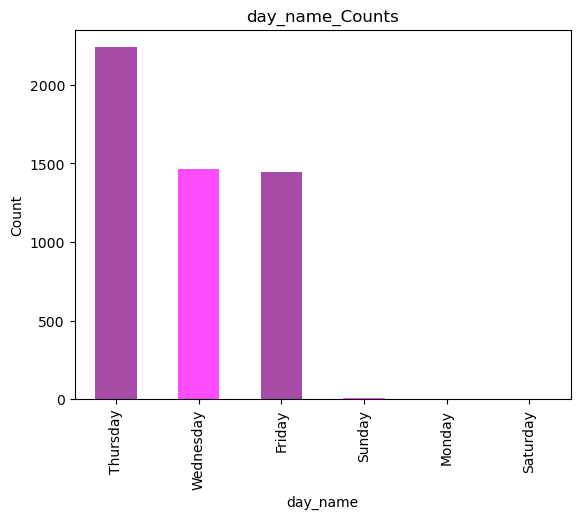

In [153]:
df1['day_name'].value_counts().plot(kind ='bar', color = ['purple','magenta'], alpha = 0.7)
plt.xlabel('day_name')
plt.ylabel('Count')
plt.title("day_name_Counts")

Thursday sees the highest engagement, followed closely by Wednesday and Friday indicating sustained interest midweek. Saturdays show the lowest activity, with users like prioritizing offline pursits

In [141]:
df1['month'].value_counts()

May        5159
October       6
Name: month, dtype: int64

In [144]:
month_counts = df1['month'].value_counts().sort_index()

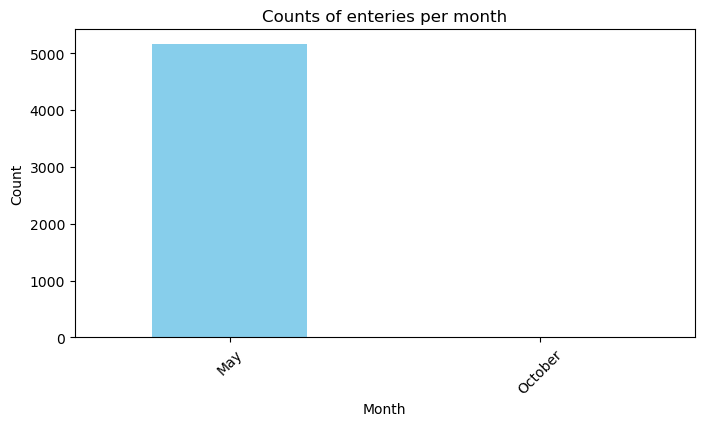

In [155]:
plt.figure(figsize=(8,4))
month_counts.plot(kind = 'bar', color = 'skyblue')
plt.title('Counts of enteries per month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

May has the highest number of entries, indicating peak engagement during this month. This spike is likely due to the bill related to the new national anthem being passed in the senate in May, driving increased discussion and interest on social media.

In [142]:
df1['year'].value_counts()

2024    5159
2023       6
Name: year, dtype: int64

In [312]:
year_counts = df1['year'].value_counts().sort_index()

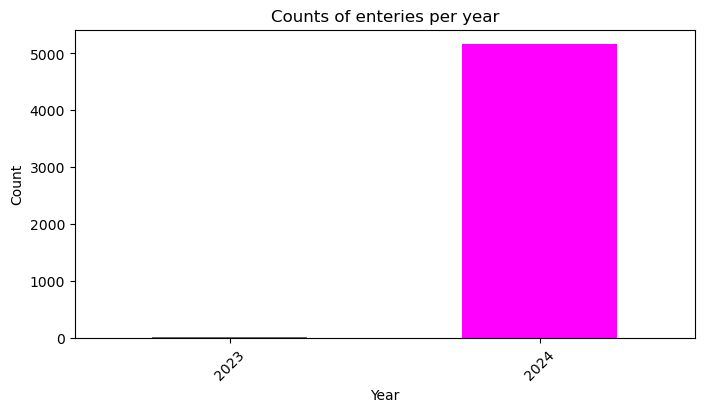

In [313]:
plt.figure(figsize=(8,4))
year_counts.plot(kind = 'bar', color = 'magenta')
plt.title('Counts of enteries per year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Text Analysis

In [157]:
import neattext.functions as nfx

In [158]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [160]:
df1['comment']

0       Is not new nao.that was what we were reciting ...
1                                    I love the old one. 
2             We no go gree with the new national anthem 
3       The labour of our heroes past don finally beco...
4                                    Is that our problem?
                              ...                        
6926                                            Amazing 😍
6927                                   Make I laugh small
6928    Well done 👍 My great educator \n\nI'm glad I'm...
6929                      Amazing 😍 I'm proud of you guys
6930                                   Absolutely amazing
Name: comment, Length: 5165, dtype: object

In [161]:
#remove all mentions #remove hashtags #url #emojis #special characters

In [162]:
df1['comment'].apply(nfx.extract_hashtags)

0       []
1       []
2       []
3       []
4       []
        ..
6926    []
6927    []
6928    []
6929    []
6930    []
Name: comment, Length: 5165, dtype: object

In [163]:
#cleaning of the text by removing the hashtags
df1['clean_comment'] = df1['comment'].apply(nfx.remove_hashtags)

In [164]:
df1[['comment', 'clean_comment']]

,comment,clean_comment
0,Is not new nao.that was what we were reciting ...,Is not new nao.that was what we were reciting ...
1,I love the old one.,I love the old one.
2,We no go gree with the new national anthem,We no go gree with the new national anthem
3,The labour of our heroes past don finally beco...,The labour of our heroes past don finally beco...
4,Is that our problem?,Is that our problem?
...,...,...
6926,Amazing 😍,Amazing 😍
6927,Make I laugh small,Make I laugh small
6928,Well done 👍 My great educator \n\nI'm glad I'm...,Well done 👍 My great educator \n\nI'm glad I'm...
6929,Amazing 😍 I'm proud of you guys,Amazing 😍 I'm proud of you guys


# Sentiment Analysis

In [165]:
from textblob import TextBlob

In [166]:
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment_polarity = blob.sentiment.polarity
    sentiment_subjectivity = blob.sentiment.subjectivity
    if sentiment_polarity > 0:
        sentiment_label = 'Positive'
    elif sentiment_polarity < 0:
        sentiment_label = 'Negative'
    else:
        sentiment_label = 'Neutral'
    result = {'Polarity':sentiment_polarity,
              'subjectivity':sentiment_subjectivity,
              'sentiment':sentiment_label}
    return result

    positive = percentage(positive, noOfTweet)
    negative = percentage(negative, noOfTweet)
    neutral = percentage(neutral, noOfTweet)
    

In [169]:
fx1 =df1['clean_comment'].iloc[4]

In [170]:
get_sentiment(fx1)

{'Polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [171]:
df1['sentiment_results'] = df1['clean_comment'].apply(get_sentiment) 

In [172]:
df1['sentiment_results']

0       {'Polarity': -0.06818181818181818, 'subjectivi...
1       {'Polarity': 0.3, 'subjectivity': 0.4, 'sentim...
2       {'Polarity': 0.13636363636363635, 'subjectivit...
3       {'Polarity': -0.125, 'subjectivity': 0.625, 's...
4       {'Polarity': 0.0, 'subjectivity': 0.0, 'sentim...
                              ...                        
6926    {'Polarity': 0.6000000000000001, 'subjectivity...
6927    {'Polarity': 0.024999999999999994, 'subjectivi...
6928    {'Polarity': 0.7666666666666666, 'subjectivity...
6929    {'Polarity': 0.7000000000000001, 'subjectivity...
6930    {'Polarity': 0.6000000000000001, 'subjectivity...
Name: sentiment_results, Length: 5165, dtype: object

In [173]:
#to split into individual component
df1['sentiment_results'].iloc[7]

{'Polarity': 0.0, 'subjectivity': 0.0, 'sentiment': 'Neutral'}

In [175]:
pd.json_normalize(df1['sentiment_results'].iloc[0])

,Polarity,subjectivity,sentiment
0,-0.068182,0.454545,Negative


In [176]:
df1 = df1.join(pd.json_normalize(df1['sentiment_results']))

# The sentimental Distribution

In [177]:
#getting the valuecounts of the result
df1['sentiment'].value_counts()

Neutral     2327
Positive    1225
Negative     557
Name: sentiment, dtype: int64

Text(0.5, 1.0, 'sentimental_Counts')

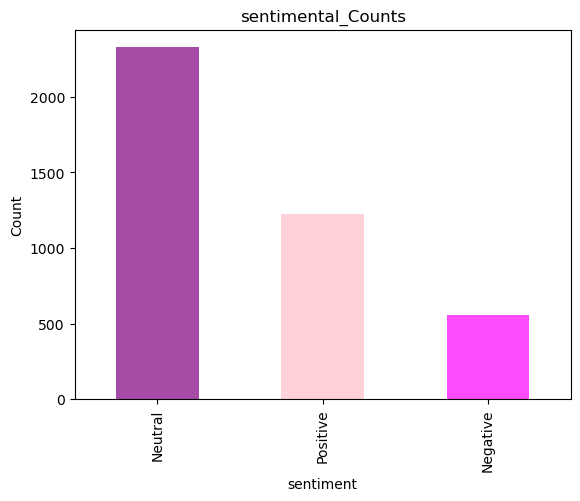

In [187]:
df1['sentiment'].value_counts().plot(kind ='bar', color = ['purple','pink', 'magenta'], alpha = 0.7)
plt.xlabel('sentiment')
plt.ylabel('Count')
plt.title("sentimental_Counts")

- Neutral sentiment prevails, suggesting a majority of individuals are either indifferent, undecided or simply sharing information about the new national anthem without expressing a clear stance.
- Positive sentiment is substantial, indicating a significant number of people appreciate and support the change, possibly acknowledge the effort to rebrand the nation’s identity.
- Negative sentiment is comparatively minimal, suggesting a smaller group of individuals are opposed to the new anthem, potentially due to attachment to the previous version or disagreement with the change


# Emotional Analysis

In [190]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
#nltk.download('vader_lexicon')

In [198]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...


True

In [178]:
#sentiment_counts = df1['sentiment'].value_counts().sort_index()

In [188]:
#plt.figure(figsize=(8,4))
#sentiment_counts.plot(kind = 'bar', color = 'pink')
#plt.title('Counts of enteries per year')
#plt.xlabel('sentiment')
#plt.ylabel('Count')
#plt.xticks(rotation=45)
#plt.show()

In [214]:
sia = SentimentIntensityAnalyzer()

In [215]:
positive_count = 0
neutral_count = 0
negative_count = 0

In [216]:
for comment in df1['comment']:
    sentiment_scores = sia.polarity_scores(comment)
    if sentiment_scores['compound'] >=0.05:
        positive_count +=1
    elif sentiment_scores['compound'] <=-0.05:
        negative_count +=1
    else:
        neutral_count +=1

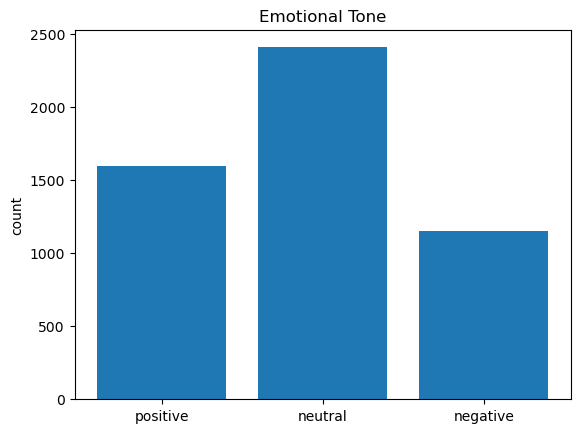

In [314]:
labels = ['positive', 'neutral', 'negative']
counts = [positive_count, neutral_count, negative_count]
plt.bar(labels, counts)
plt.ylabel("count")
plt.title("Emotional Tone")
plt.show()

- Observation 
- Based on the emotional tone analysis, it appears that the sentiment of the new Nigeria anthem is largely neutral, with a smaller portion of positive sentiment and a minimal amount of negative sentiment. 
- This suggests that majority of the citizens are neither strongly enthusiastic nor strongly opposed to the new national anthem, but rather are accepting or indifferent to it. The positive sentiment detected may indicate a sense of patriotism or optimism among some citizens while the minimal negative sentiment may suggest some dissatisfaction 


In [240]:
#import re

In [241]:
#def remove_emojis(comment):
#    if not isinstance(comment, str):
#        return comment
#    return
#re.sub(r'[^\x00-\x7f]', r'', comment)

#comments = [remove_emojis(comment) for comment in comments if isinstance(comment, str)]

# Keyword Extraction

In [242]:
positive_comment = df1[df1['sentiment'] == 'Positive']['clean_comment']

In [243]:
neutral_comment = df1[df1['sentiment'] == 'Neutral']['clean_comment']
negative_comment = df1[df1['sentiment'] == 'Negative']['clean_comment']

In [244]:
positive_comment

1                                    I love the old one. 
2             We no go gree with the new national anthem 
6                                                NICE ONE
10      FG don drop hit track let’s see if it will be ...
18                                          What is 50k ?
                              ...                        
5160                               @_omalichanwa Amin o 😂
5161                                                  Wow
5162                @elizzyorok the lord is your strength
5163                              I pray I know this oooo
5164    The baba Werey wey implement ham sef no sabi h...
Name: clean_comment, Length: 1225, dtype: object

In [245]:
#remove stopwords and convert to tokens
positive_comment_list = positive_comment.apply(nfx.remove_stopwords).tolist()

In [246]:
negative_comment_list = negative_comment.apply(nfx.remove_stopwords).tolist()
neutral_comment_list = neutral_comment.apply(nfx.remove_stopwords).tolist()

In [247]:
positive_comment_list

['love old one.',
 'gree new national anthem',
 'NICE',
 'FG drop hit track let’s number Apple Music charts 😂',
 '50k ?',
 'New anthem Dey?',
 'Yh',
 'New old 😩',
 '@callmeatom_ swears....that na em business',
 '@big_shuga_lee 😂',
 'Waiting 50k fit buy?',
 'old self people learn finish 😢',
 '@deronke_homes_decor comment section suppose voice note 🥲',
 '😂',
 '@kaygraphicofficial_ UAR',
 'Old recent',
 'like Una shofoo',
 'Omo 50k rest Abeg.',
 '50k go. National anthem wey sound like skales song',
 '@unique_interior05 Jesus 😂😂😂😂😂😂',
 'Dey mind money 😢',
 '@callmeatom_ one,this outdated😂',
 '@mercy_samuel20 e concern person wer change 😂😂',
 'now..',
 '@arikeeee_ 😂😂😂',
 'problem hand country dae collapse Nigerians playing keeping quiet,this beginning sha',
 'Oya nah, old reinstate',
 'recite old sign law',
 '@callmeatom_ old dis,una presido create new',
 '@kaygraphicofficial_ new, economy new 😂',
 '@deronke_homes_decor u dey hot',
 '😂😂😂 it’s gone',
 'lose money 😢',
 'Ahhhhaann baba watin h

In [248]:
negative_comment_list

['new nao.that reciting days',
 'labour heroes past finally vain chai',
 '@kaygraphicofficial_ 😂😂😂😂',
 'Wetin know anthem dey pay bills',
 'Old oooo😂😂😂',
 '@___thereallight 😂😂😂',
 'old Amapiano version ?',
 'want to, new anthem hug bubu😂',
 'New old ???',
 'Na wetin u deh use b4 dem change 😂😂😂am 69',
 'disturb ?? like jare 😂',
 "Lol, I've heard",
 "Yes, can!!! Thank God private School. I'll win old new anthem contest",
 "Tinubu's administration failed terribly. Leave National anthem solve National problems now.",
 'complain people mind complain 😄 guys vote Apc finished mind complain feel una early 💯 8 years sure play generation 👈',
 'Congratulation !',
 'stop corruption',
 'Misplaced priority! 😏',
 'Na primary school suffer ram',
 'Na queen Lagos, Dem change am, brotherhood inside anthem',
 'mute new anthem, ask question due.',
 'AER PROUD WORLD https://scontent.flos5-1.fna.fbcdn.net/v/t39.1997-6/37028833_274074926696800_89084592450961408_n.png?stp=cp0_dst-png_s110x80&_nc_cat=1&ccb=1-7

# Tokenization

In [249]:
for line in positive_comment_list:
    print(line)
    for token in line.split():
        print(token)

love old one.
love
old
one.
gree new national anthem
gree
new
national
anthem
NICE
NICE
FG drop hit track let’s number Apple Music charts 😂
FG
drop
hit
track
let’s
number
Apple
Music
charts
😂
50k ?
50k
?
New anthem Dey?
New
anthem
Dey?
Yh
Yh
New old 😩
New
old
😩
@callmeatom_ swears....that na em business
@callmeatom_
swears....that
na
em
business
@big_shuga_lee 😂
@big_shuga_lee
😂
Waiting 50k fit buy?
Waiting
50k
fit
buy?
old self people learn finish 😢
old
self
people
learn
finish
😢
@deronke_homes_decor comment section suppose voice note 🥲
@deronke_homes_decor
comment
section
suppose
voice
note
🥲
😂
😂
@kaygraphicofficial_ UAR
@kaygraphicofficial_
UAR
Old recent
Old
recent
like Una shofoo
like
Una
shofoo
Omo 50k rest Abeg.
Omo
50k
rest
Abeg.
50k go. National anthem wey sound like skales song
50k
go.
National
anthem
wey
sound
like
skales
song
@unique_interior05 Jesus 😂😂😂😂😂😂
@unique_interior05
Jesus
😂😂😂😂😂😂
Dey mind money 😢
Dey
mind
money
😢
@callmeatom_ one,this outdated😂
@callmeatom_
one,thi

In [250]:
pos_tokens=[token for line in positive_comment_list for token in line.split()]

In [251]:
neg_tokens=[token for line in negative_comment_list for token in line.split()]
neut_tokens=[token for line in neutral_comment_list for token in line.split()]

In [252]:
pos_tokens

['love',
 'old',
 'one.',
 'gree',
 'new',
 'national',
 'anthem',
 'NICE',
 'FG',
 'drop',
 'hit',
 'track',
 'let’s',
 'number',
 'Apple',
 'Music',
 'charts',
 '😂',
 '50k',
 '?',
 'New',
 'anthem',
 'Dey?',
 'Yh',
 'New',
 'old',
 '😩',
 '@callmeatom_',
 'swears....that',
 'na',
 'em',
 'business',
 '@big_shuga_lee',
 '😂',
 'Waiting',
 '50k',
 'fit',
 'buy?',
 'old',
 'self',
 'people',
 'learn',
 'finish',
 '😢',
 '@deronke_homes_decor',
 'comment',
 'section',
 'suppose',
 'voice',
 'note',
 '🥲',
 '😂',
 '@kaygraphicofficial_',
 'UAR',
 'Old',
 'recent',
 'like',
 'Una',
 'shofoo',
 'Omo',
 '50k',
 'rest',
 'Abeg.',
 '50k',
 'go.',
 'National',
 'anthem',
 'wey',
 'sound',
 'like',
 'skales',
 'song',
 '@unique_interior05',
 'Jesus',
 '😂😂😂😂😂😂',
 'Dey',
 'mind',
 'money',
 '😢',
 '@callmeatom_',
 'one,this',
 'outdated😂',
 '@mercy_samuel20',
 'e',
 'concern',
 'person',
 'wer',
 'change',
 '😂😂',
 'now..',
 '@arikeeee_',
 '😂😂😂',
 'problem',
 'hand',
 'country',
 'dae',
 'collapse',
 'Ni

In [253]:
#getting the most common keywords used 
from collections import Counter

In [254]:
def get_tokens(docx, num=30):
    word_tokens = Counter(docx)
    most_common = word_tokens.most_common(num)
    result = dict(most_common)
    return result

In [255]:
get_tokens(pos_tokens)

{'anthem': 150,
 'dey': 94,
 'national': 84,
 'learn': 84,
 'Nigeria': 84,
 'new': 64,
 'sing': 63,
 'country': 62,
 'na': 61,
 'old': 56,
 '😂': 54,
 'people': 51,
 'Na': 48,
 'know': 43,
 'God': 39,
 '😂😂😂': 36,
 'like': 35,
 'Good': 32,
 'National': 30,
 'change': 28,
 'come': 28,
 'morning': 26,
 'school': 24,
 'Dey': 23,
 '😂😂😂😂': 23,
 'fit': 22,
 'problem': 22,
 'children': 22,
 'chop': 21,
 'u': 20}

In [256]:
most_common_pos_words = get_tokens(pos_tokens)
most_common_neg_words = get_tokens(neg_tokens)
most_common_neut_words = get_tokens(neut_tokens)

In [257]:
neg_df1 = pd.DataFrame(most_common_neg_words.items(), columns=['words', 'count'])

In [258]:
neg_df1

,words,count
0,anthem,56
1,national,41
2,dey,38
3,learn,36
4,sing,34
5,morning,32
6,Good,30
7,old,29
8,Nigeria,28
9,na,28


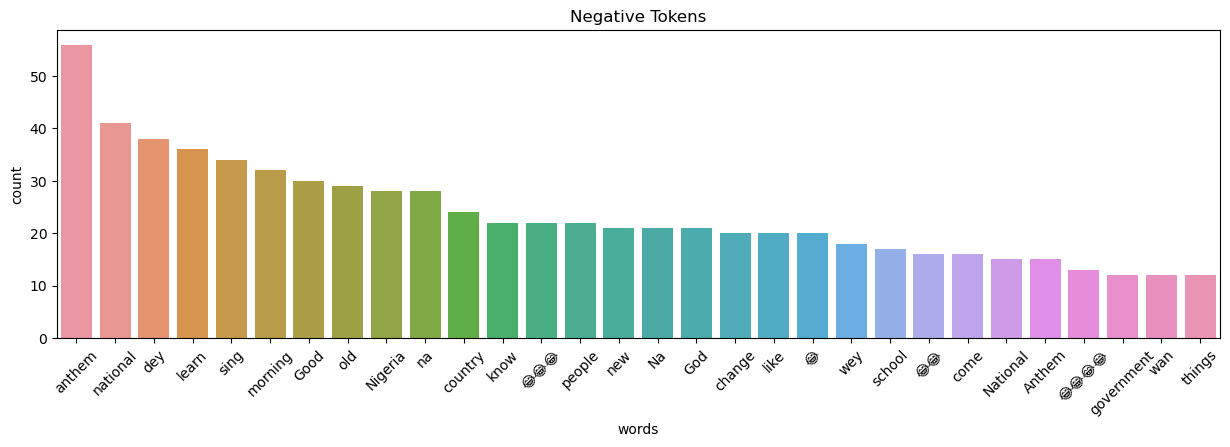

In [261]:
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=neg_df1)
plt.xticks(rotation=45)
plt.title("Negative Tokens")
plt.show()

In [262]:
#for positive sentiment
pos_df1 = pd.DataFrame(most_common_pos_words.items(), columns=['words', 'count'])

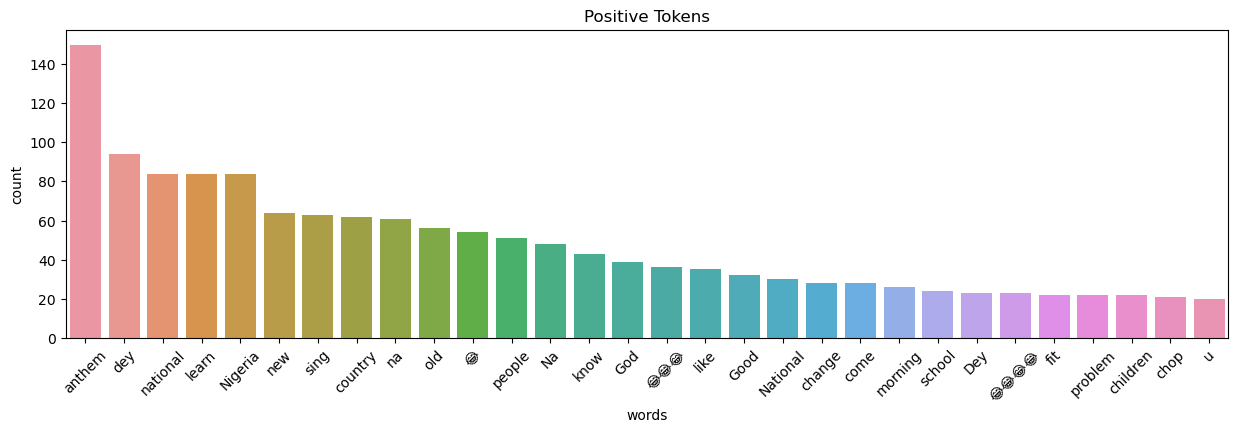

In [263]:
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=pos_df1)
plt.xticks(rotation=45)
plt.title("Positive Tokens")
plt.show()

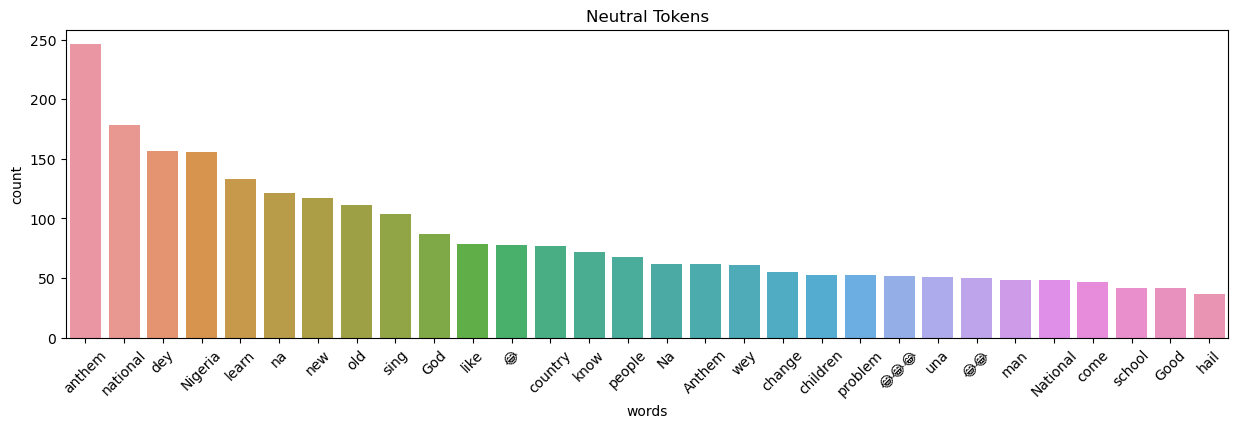

In [264]:
# for neutral
neut_df1 = pd.DataFrame(most_common_neut_words.items(), columns=['words', 'count'])
plt.figure(figsize=(15,4))
sns.barplot(x ='words', y='count', data=neut_df1)
plt.xticks(rotation=45)
plt.title("Neutral Tokens")
plt.show()

In [315]:
neut_df1

,words,count
0,anthem,246
1,national,178
2,dey,157
3,Nigeria,156
4,learn,133
5,na,121
6,new,117
7,old,111
8,sing,104
9,God,87


In [265]:
#frequently used keywords

In [266]:
from wordcloud import WordCloud

In [267]:
def plot_wordcloud(docx):
    plt.figure(figsize=(10,5))
    mywordcloud = WordCloud().generate(docx)
    plt.imshow(mywordcloud,interpolation='bilinear')
    plt.axis('off')
    plt.show()

In [268]:
pos_docx= ' '.join(pos_tokens)
neg_docx= ' '.join(neg_tokens)
neut_docx= ' '.join(neut_tokens)

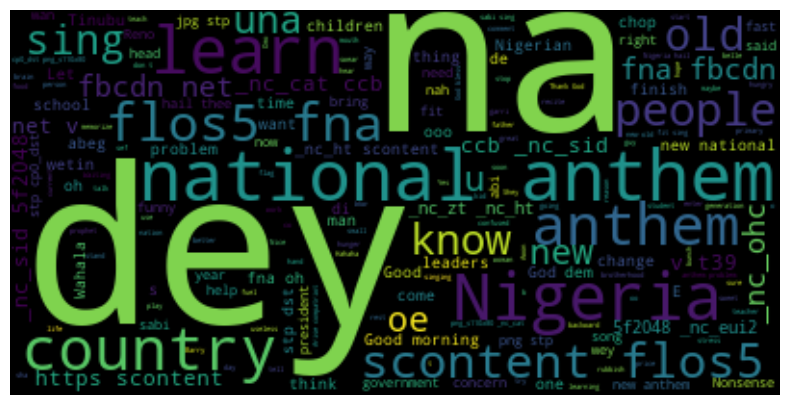

In [269]:
plot_wordcloud(pos_docx)

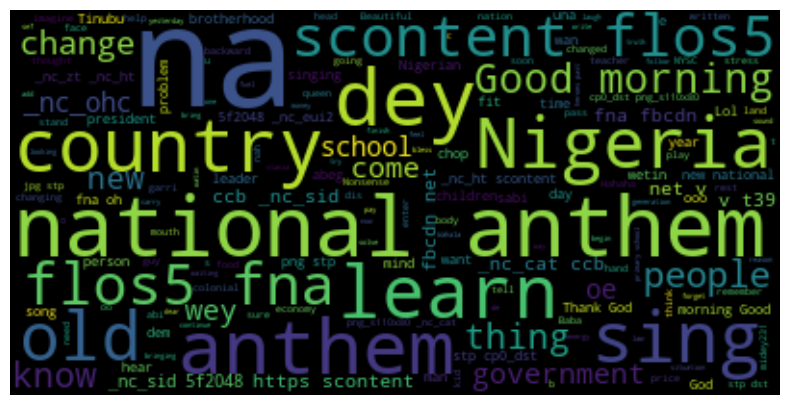

In [270]:
plot_wordcloud(neg_docx)

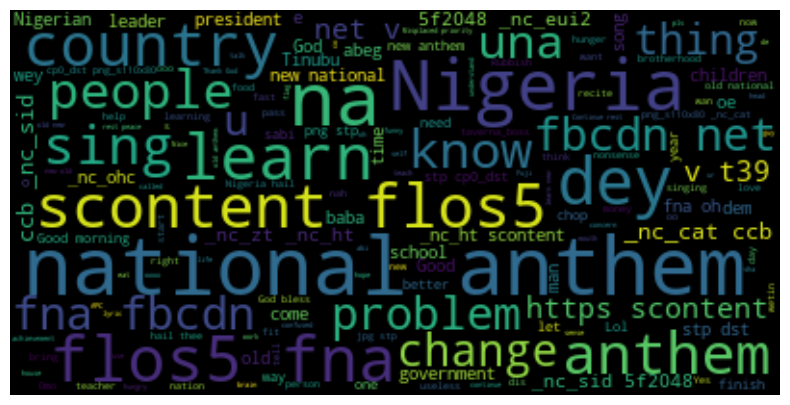

In [271]:
plot_wordcloud(neut_docx)

# Relationship between sentiment and likes

In [281]:
df1['likes'].sum()

2485.0

In [283]:
from textblob import TextBlob
df1['sentiment'] = df1['comment'].apply(lambda x:TextBlob(x). sentiment.polarity)
df1['likes']  = df1['likes'].astype(int)


In [284]:
sentiment_groups = df1.groupby('sentiment')
average_likes = sentiment_groups['likes'].mean()
print(average_likes)

sentiment
-1.000000     0.000000
-0.976562     0.000000
-0.875000    10.000000
-0.812500     0.000000
-0.800000     0.000000
               ...    
 0.875000     0.000000
 0.900000     1.500000
 0.910000     0.666667
 0.925000     0.000000
 1.000000     0.233333
Name: likes, Length: 487, dtype: float64


Text(0.5, 1.0, 'Relationship betweeen sentiment and likes')

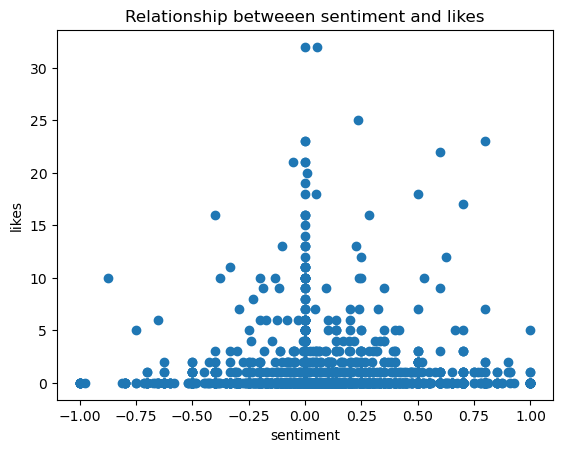

In [285]:
plt.scatter(df1['sentiment'], df1['likes'])
plt.xlabel('sentiment')
plt.ylabel('likes')
plt.title("Relationship betweeen sentiment and likes")

- Positive sentiment is associated with higher likes, indicating that engaging and uplifting content resonate with the audience.
- Negative sentiment (left side) receives fewer likes, suggesting that critical or negative content is less engaging.
- Neutral sentiment has a consistent number of likes, indicating a moderate level of engagement with balanced content 


# Impact of specific aspects

In [287]:
df1['sentiment'] = df1['comment'].apply(lambda x: TextBlob(x).sentiment.polarity) 
#creating separate columns for each aspects
df1['melody_sentiment'] = df1['comment'].apply(lambda x:TextBlob(x).sentiment.polarity if 'melody' in x else 0)
df1['lyrics_sentiment'] = df1['comment'].apply(lambda x:TextBlob(x).sentiment.polarity if 'lyrics' in x else 0)
df1['arrangement_sentiment'] = df1['comment'].apply(lambda x:TextBlob(x).sentiment.polarity if 'arrangement' in x 
                                                    else 0)


In [288]:
#getting average sentiment
aspect_groups = df1.groupby(['melody_sentiment', 'lyrics_sentiment', 'arrangement_sentiment'])
average_sentiment = aspect_groups['sentiment'].mean()

print(average_sentiment)

melody_sentiment  lyrics_sentiment  arrangement_sentiment
0.0               -0.650000         0                       -0.650000
                  -0.500000         0                       -0.500000
                  -0.400000         0                       -0.400000
                  -0.300000         0                       -0.300000
                  -0.291667         0                       -0.291667
                  -0.150000         0                       -0.150000
                  -0.106250         0                       -0.106250
                  -0.080000         0                       -0.080000
                   0.000000         0                        0.064990
                   0.083788         0                        0.083788
                   0.094444         0                        0.094444
                   0.100000         0                        0.100000
                   0.200000         0                        0.200000
                   0.300000     

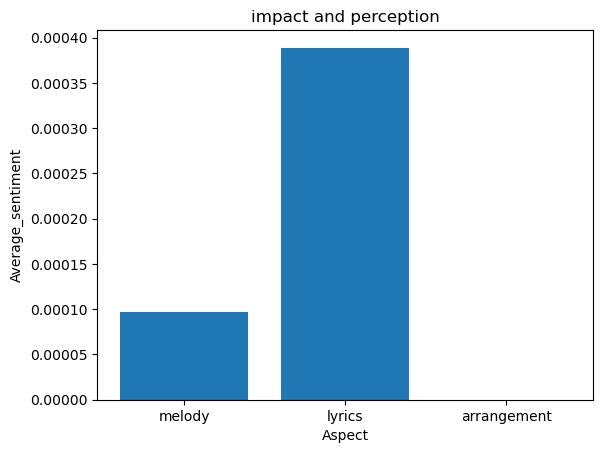

In [316]:
x = np.array(['melody', 'lyrics', 'arrangement'])
y = np.array([df1['melody_sentiment'].mean(), df1['lyrics_sentiment'].mean(),
             df1['arrangement_sentiment'].mean()])

plt.bar(x, y)
plt.xlabel('Aspect')
plt.ylabel('Average_sentiment')
plt.title("impact and perception")
plt.show()

# Identifying inflential voices from the comments

In [ ]:
from collections import Counter

In [303]:
username_counts = Counter(df1['username'])
username_sentiment = df1.groupby('username')['sentiment'].sum()

In [304]:
influencers = pd.DataFrame({'username':list(username_counts.keys()), 'count':
                           list(username_counts.values()),
                           'sentiment':
                           list(username_sentiment)})

In [305]:
influencers = influencers.sort_values(by=['count', 'sentiment'], ascending = False)
print(influencers.head())

                  username  count  sentiment
4312  Mamapikincomedy Ejeh      5      0.700
4806      @user-fc9dq1yk5r      5      0.500
27             callmeatom_      5     -0.675
522          victorxxfrank      4      0.800
1783  Alhaji Sa'ad Olukodo      4      0.600


In [308]:
top_5 = influencers.head(5)
top_5

,username,count,sentiment
4312,Mamapikincomedy Ejeh,5,0.700
4806,@user-fc9dq1yk5r,5,0.500
27,callmeatom_,5,-0.675
522,victorxxfrank,4,0.800
1783,Alhaji Sa'ad Olukodo,4,0.600


In [ ]:
Mamapikincomedy Ejeh
@user-fc9dq1yk5r

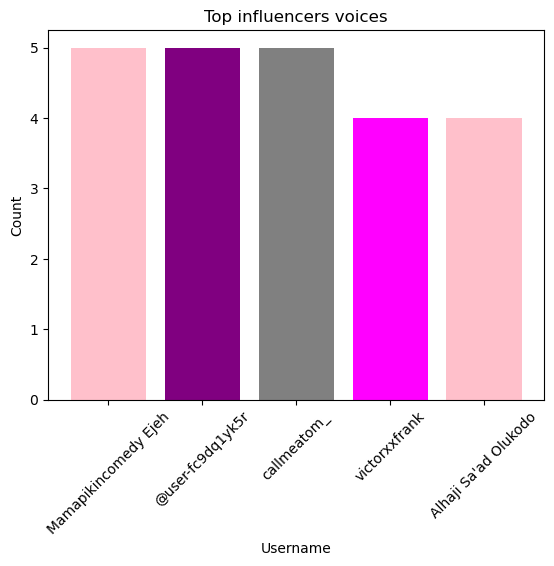

In [319]:
plt.bar(top_5['username'], top_5['count'], color=['#FFC0CB', '#800080','#808080','#FF00FF'])
plt.xlabel('Username')
plt.ylabel('Count')
plt.title('Top influencers voices')
#plt.grid()
plt.xticks(rotation = 45)
plt.show()

- observations

- Mamapikincomedy Ejeh and victorxxfrank are strong supporters of the ntional anthem
- @user-fc9dq1yk5r has a neutral stance
- callmeatom_ is strongly opposed to the national anthem
- Alhaji Sa'ad Olukodo is supportive but with a lower level of engagement compared to the top 2 supporters


In [295]:
df2 = df1.copy()

In [297]:
df2.head(2)

,username,url,likes,comment,day_name,month,year,hour,minute,clean_comment,sentiment_results,Polarity,subjectivity,sentiment,melody_sentiment,lyrics_sentiment,arrangement_sentiment
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,1,Is not new nao.that was what we were reciting ...,Monday,May,2024,19,36,Is not new nao.that was what we were reciting ...,"{'Polarity': -0.06818181818181818, 'subjectivi...",-0.068182,0.454545,-0.068182,0.0,0.0,0
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,1,I love the old one.,Monday,May,2024,14,16,I love the old one.,"{'Polarity': 0.3, 'subjectivity': 0.4, 'sentim...",0.300000,0.400000,0.300000,0.0,0.0,0


In [300]:
df2.drop(columns = ['hour', 'minute', 'clean_comment',
                    'sentiment_results', 'Polarity', 'subjectivity',
                   'sentiment','melody_sentiment', 'lyrics_sentiment',
                   'arrangement_sentiment'], inplace = True, errors = 'ignore')

In [301]:
df2.head(2)

,username,url,likes,comment,day_name,month,year
0,@Babykk-sr1hb,https://yt3.ggpht.com/YYlsTlSGZ4SlSjrlF7NkLT2V...,1,Is not new nao.that was what we were reciting ...,Monday,May,2024
1,@AyaereOdeh-mb3uc,https://yt3.ggpht.com/ytc/AIdro_li0yM6cYLIOWjD...,1,I love the old one.,Monday,May,2024


In [302]:
df2.to_csv("new_national_anthem_dataset.csv", index = False)